Linear Regression

In [3]:
#Loading all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
#loading the values in different vectors

price=np.array([160,280,180,200,260,240,220,170])
sales=np.array([125,120,104,85,40,80,75,79])

In [23]:
#Making a data frame from the two vectors
df=pd.DataFrame(np.stack((price,sales), axis=1), columns=["Price","Sales"])
print(df)

   Price  Sales
0    160    125
1    280    120
2    180    104
3    200     85
4    260     40
5    240     80
6    220     75
7    170     79


In [25]:
df.shape

(8, 2)

In [26]:
df.head()

,Price,Sales
0,160,125
1,280,120
2,180,104
3,200,85
4,260,40


In [27]:
df.describe()

,Price,Sales
count,8.000000,8.000000
mean,213.750000,88.500000
std,43.732139,27.448653
min,160.000000,40.000000
25%,177.500000,78.000000
50%,210.000000,82.500000
75%,245.000000,108.000000
max,280.000000,125.000000


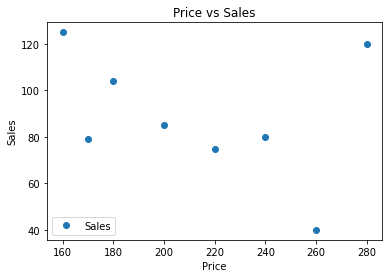

In [28]:
#plotting values
df.plot(x='Price', y='Sales', style='o')
plt.title('Price vs Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()

In [31]:
#Reshaping values
p=price.reshape(-1,1)
s=sales.reshape(-1,1)
print(p)
print(s)

[[160]
 [280]
 [180]
 [200]
 [260]
 [240]
 [220]
 [170]]
[[125]
 [120]
 [104]
 [ 85]
 [ 40]
 [ 80]
 [ 75]
 [ 79]]


In [34]:
#Splitting Data into test and train
Price_train, Price_test, Sales_train, Sales_test = train_test_split(p, s)

In [35]:
#Linear regression algorithm
reg = LinearRegression()
reg.fit(Price_train, Sales_train) #training the algorithm

LinearRegression()

In [36]:
#Getting intercept
print(reg.intercept_)
#Getting the slope:
print(reg.coef_)

[84.0464716]
[[0.06919105]]


In [47]:
#Seeing the trained model's predictions
pred_train=reg.predict(Price_train)
df_train=pd.DataFrame(np.stack((Sales_train.flatten(),pred_train.flatten()), axis=1), columns=["Actual Value","Predicted Value"])
print("Actual vs predicted value for training data")
print(df_train)

Actual vs predicted value for training data
   Actual Value  Predicted Value
0         120.0       103.419966
1          79.0        95.808950
2          75.0        99.268503
3         104.0        96.500861
4          85.0        97.884682
5         125.0        95.117040


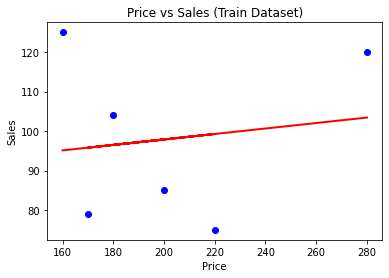

In [48]:
#Plotting actual vs predicted values for training dataset
plt.scatter(Price_train, Sales_train, color='blue')
plt.plot(Price_train, pred_train, color='red', linewidth=2)
plt.title("Price vs Sales (Train Dataset)")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

In [38]:
#Making predictions
Prediction=reg.predict(Price_test)

In [41]:
df2=pd.DataFrame(np.stack((Sales_test.flatten(),Prediction.flatten()), axis=1), columns=["Actual Value","Predicted Value"])
print(df2)

   Actual Value  Predicted Value
0          40.0       102.036145
1          80.0       100.652324


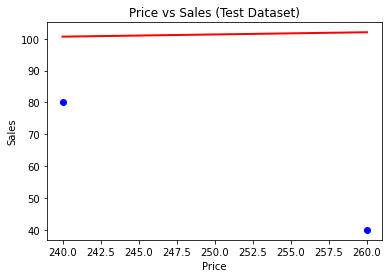

In [46]:
plt.scatter(Price_test, Sales_test, color='blue')
plt.plot(Price_test, Prediction, color='red', linewidth=2)
plt.title("Price vs Sales (Test Dataset)")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Sales_test, Prediction))
print('Mean Squared Error:', metrics.mean_squared_error(Sales_test, Prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Sales_test, Prediction)))

Mean Absolute Error: 41.344234079173845
Mean Squared Error: 2137.500851697916
Root Mean Squared Error: 46.23311423317616


Decision Tree Algorithm

In [50]:
from sklearn.datasets import load_iris
from sklearn import tree
dataset=load_iris()
data,label=dataset.data,dataset.target
classifier=tree.DecisionTreeClassifier()
classifier=classifier.fit(data,label)

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

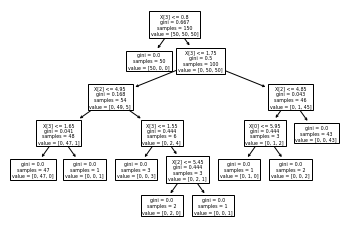

In [51]:
tree.plot_tree(classifier)

In [54]:
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Find-s Algorithm

In [1]:
import pandas as pd
import numpy as np

In [2]:
#data
arr=np.array([['Sunny', 'Warm', 'Normal' ,'Strong' ,'Warm', 'Same','yes'] ,
                     ['Sunny', 'Warm' ,'High', 'Strong', 'Warm' ,'Same','yes'] ,
                     ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change','no'], 
                    ['Sunny', 'Warm', 'High' ,'Strong', 'Cool', 'Change','yes']])
print(arr)

[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same' 'yes']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same' 'yes']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change' 'no']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change' 'yes']]


In [3]:
#adding column names
df=pd.DataFrame(arr, columns=['Sky','Temperature','Humidity','Wind','Water','Forecast','Enjoy'])

In [4]:
df

,Sky,Temperature,Humidity,Wind,Water,Forecast,Enjoy
0,Sunny,Warm,Normal,Strong,Warm,Same,yes
1,Sunny,Warm,High,Strong,Warm,Same,yes
2,Rainy,Cold,High,Strong,Warm,Change,no
3,Sunny,Warm,High,Strong,Cool,Change,yes


In [5]:
#showing the label i.e the attribute that is the target 
label=np.array(arr)[:,-1]
print(label)

['yes' 'yes' 'no' 'yes']


In [8]:
def findS(row,label):
    for i, value in enumerate(label):
        if value=="yes":
            sp_hypo=row[i].copy()
            break
    for i,value in enumerate(row):
        if label[i]=="yes":
            for x in range(len(sp_hypo)):
                if value[x]!=sp_hypo[x]:
                    sp_hypo[x]='?'
                else:
                    pass
    return sp_hypo

In [9]:
print(findS(arr,label))

['Sunny' 'Warm' '?' 'Strong' '?' '?' 'yes']


Candidate Elimination Algorithm ['Sunny' 'Warm' '?' 'Strong' '?' '?' 'yes']

In [26]:
#Importing the data from csv file
df=pd.read_csv("Smile_Data.csv")

In [27]:
df.head()

,Eyes,Nose,Head,Fcolor,Hair,Smile
0,Round,Triangle,Round,Purple,Yes,Yes
1,Square,Square,Square,Green,Yes,No
2,Square,Triangle,Round,Yellow,Yes,Yes
3,Round,Triangle,Round,Green,No,No
4,Square,Square,Round,Yellow,Yes,Yes


In [29]:
#extracting rows from dataframe in a NumPy array
arr=np.array(df.iloc[:,0:-1])
arr

array([['Round', 'Triangle', 'Round', 'Purple', 'Yes'],
       ['Square', 'Square', 'Square', 'Green', 'Yes'],
       ['Square', 'Triangle', 'Round', 'Yellow', 'Yes'],
       ['Round', 'Triangle', 'Round', 'Green', 'No'],
       ['Square', 'Square', 'Round', 'Yellow', 'Yes']], dtype=object)

In [30]:
#showing the label i.e the attribute that is the target 
label=np.array(arr)[:,-1]
print(label)

['Yes' 'Yes' 'Yes' 'No' 'Yes']


In [38]:
def candidate_elimination(arr,label):
    sp_hypo = arr[0].copy()
    #print("Initialization of Specific and General Hypothesis")
    print("Initial Specific Hypothesis: ",sp_hypo)
    gen_hypo = [["?" for i in range(len(sp_hypo))] for i in range(len(sp_hypo))]
    print("Initial General Hypothesis: ",gen_hypo)
    print("\n Starting Algorithm: ")
    for i, h in enumerate(arr):
        if label[i] == "Yes":
            for x in range(len(sp_hypo)):
                print("h[x]",h[x])
                if h[x] != sp_hypo[x]:
                    sp_hypo[x] = '?'
                    gen_hypo[x][x] = '?'

        if label[i] == "No":
            for x in range(len(sp_hypo)):
                if h[x] != sp_hypo[x]:
                    gen_hypo[x][x] = sp_hypo[x]
                else:
                    gen_hypo[x][x] = '?'

        print("\nIteration: ",i+1)
        print("Specific Hypothesis: ",i+1)
        print(sp_hypo,"\n")
        print("General Hypothesis:", i+1)
        print(gen_hypo)

    indices = [i for i, val in enumerate(gen_hypo) if val == ['?', '?', '?', '?', '?', '?']]
    print("\nIndices",indices)

    for i in indices:
        gen_hypo.remove(['?', '?', '?', '?', '?', '?'])

    return sp_hypo, gen_hypo

In [39]:
s,g=candidate_elimination(arr,label)

Initial Specific Hypothesis:  ['Round' 'Triangle' 'Round' 'Purple' 'Yes']
Initial General Hypothesis:  [['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]

 Starting Algorithm: 
h[x] Round
h[x] Triangle
h[x] Round
h[x] Purple
h[x] Yes

Iteration:  1
Specific Hypothesis:  1
['Round' 'Triangle' 'Round' 'Purple' 'Yes'] 

General Hypothesis: 1
[['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]
h[x] Square
h[x] Square
h[x] Square
h[x] Green
h[x] Yes

Iteration:  2
Specific Hypothesis:  2
['?' '?' '?' '?' 'Yes'] 

General Hypothesis: 2
[['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]
h[x] Square
h[x] Triangle
h[x] Round
h[x] Yellow
h[x] Yes

Iteration:  3
Specific Hypothesis:  3
['?' '?' '?' '?' 'Yes'] 

General Hypothesis: 3
[['?', '?', '?

In [44]:
print("Specific Hypothesis: ",s)
print("General Hypothesis: ",g)

Specific Hypothesis:  ['?' '?' '?' '?' 'Yes']
General Hypothesis:  [['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', 'Yes']]


ID3 Algorithm

In [76]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [77]:
df=load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [78]:
print(df.target_names)

['setosa' 'versicolor' 'virginica']


In [79]:
print(df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [80]:
data,label=df.data,df.target

In [81]:
#Splitting the data into train and test
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.33, random_state = 42)

In [82]:
#Building the classifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(data_train,label_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [83]:
#Using built classifier to predict on our test data
Prediction=classifier.predict(data_test)

In [84]:
#Seeing how accurately our classifier worked
print('Model accuracy score (by using gini index): {0:0.6f}'. format(accuracy_score(label_test,Prediction)))

Model accuracy score (by using gini index): 0.980000


[Text(0.4444444444444444, 0.9285714285714286, 'X[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'X[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'X[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'X[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'X[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.07142857142

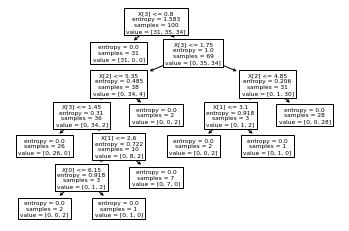

In [85]:
tree.plot_tree(classifier)

In [86]:
#Confusion Matrix
Confusion_mat = confusion_matrix(label_test,Prediction)
Confusion_mat

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

In [87]:
print(classification_report(label_test,Prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



CART Decision TREE

In [105]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn import metrics

In [106]:
df=load_diabetes()
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [107]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [108]:
data,label=df.data,df.target

In [109]:
#Splitting the data into train and test
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.33, random_state = 42)

In [110]:
#Building the classifier
classifier = tree.DecisionTreeRegressor()
classifier.fit(data_train,label_train)

DecisionTreeRegressor()

In [111]:
#Using built classifier to predict on our test data
Prediction=classifier.predict(data_test)

[Text(0.5736571082390953, 0.9705882352941176, 'X[2] <= 0.009\nsquared_error = 6015.949\nsamples = 296\nvalue = 151.983'),
 Text(0.31267669628432954, 0.9117647058823529, 'X[8] <= -0.003\nsquared_error = 3767.542\nsamples = 187\nvalue = 119.941'),
 Text(0.15839559773828757, 0.8529411764705882, 'X[5] <= 0.091\nsquared_error = 2611.689\nsamples = 116\nvalue = 99.836'),
 Text(0.1255553311793215, 0.7941176470588235, 'X[8] <= -0.043\nsquared_error = 2296.93\nsamples = 114\nvalue = 97.351'),
 Text(0.06956785137318255, 0.7352941176470589, 'X[4] <= -0.039\nsquared_error = 1554.954\nsamples = 41\nvalue = 79.146'),
 Text(0.047051696284329564, 0.6764705882352942, 'X[4] <= -0.046\nsquared_error = 1904.926\nsamples = 23\nvalue = 95.826'),
 Text(0.0327140549273021, 0.6176470588235294, 'X[0] <= -0.0\nsquared_error = 1187.507\nsamples = 19\nvalue = 82.579'),
 Text(0.023424878836833602, 0.5588235294117647, 'X[6] <= 0.036\nsquared_error = 809.571\nsamples = 14\nvalue = 75.0'),
 Text(0.014539579967689823, 

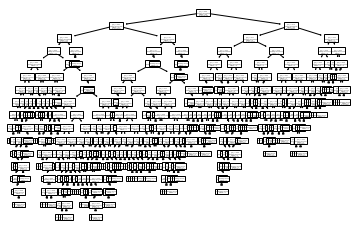

In [113]:
tree.plot_tree(classifier)

In [115]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data_test, Prediction))
print('Mean Squared Error:', metrics.mean_squared_error(data_test, Prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data_test, Prediction)))

ValueError: y_true and y_pred have different number of output (10!=1)